In [11]:
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from pathlib import Path

import pandas as pd
import numpy as np
np.random.seed(6)

from tifffile import imread
from tifffile import imwrite
import matplotlib.pyplot as plt

In [12]:
dapi_name = 'cyc_1_dapi.tif'
BASE_DIR = Path('E:/TMC/PRISM_pipeline/dataset/processed')
RUN_ID = '_example_dataset'
src_dir = BASE_DIR / f'{RUN_ID}_processed'
stc_dir = src_dir / 'stitched'
read_dir = src_dir / 'readout'
seg_dir = src_dir / 'segmented'
os.makedirs(seg_dir, exist_ok=True)

In [13]:
len(pd.read_csv(read_dir/'intensity_all.csv', index_col=0))

4879832

In [14]:
len(pd.read_csv(read_dir/'intensity_deduplicated.csv', index_col=0))

2257943

In [15]:
intensity = pd.read_csv(read_dir/'intensity_all.csv', index_col=0)

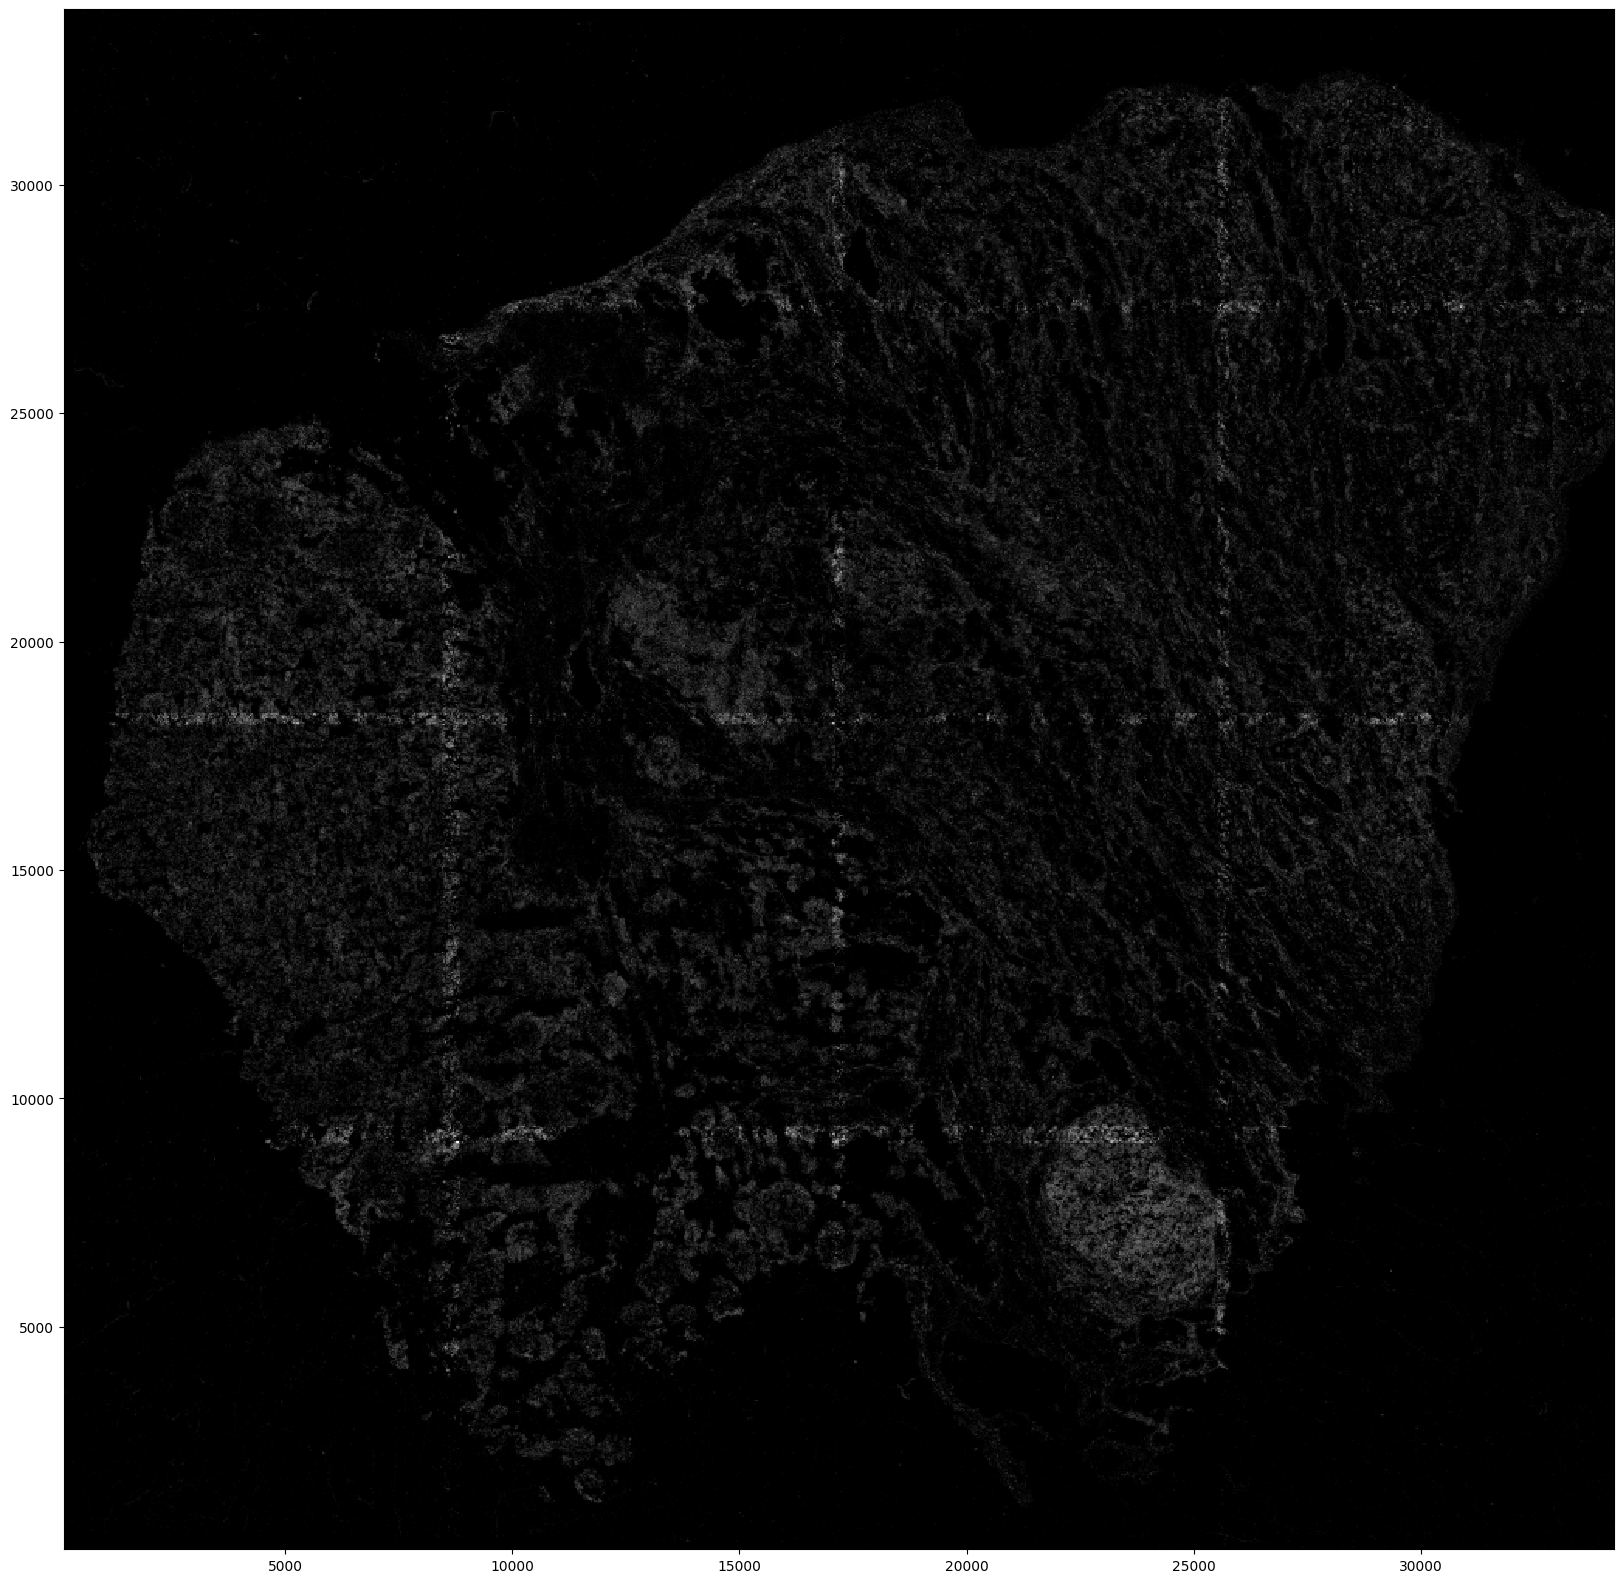

In [16]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.hist2d(intensity['X'], intensity['Y'],
           vmin=0, bins=[1000,1000], cmap='gray',)
plt.show()

In [17]:
intensity_deduplicated = pd.read_csv(read_dir/'intensity_deduplicated.csv', index_col=0)

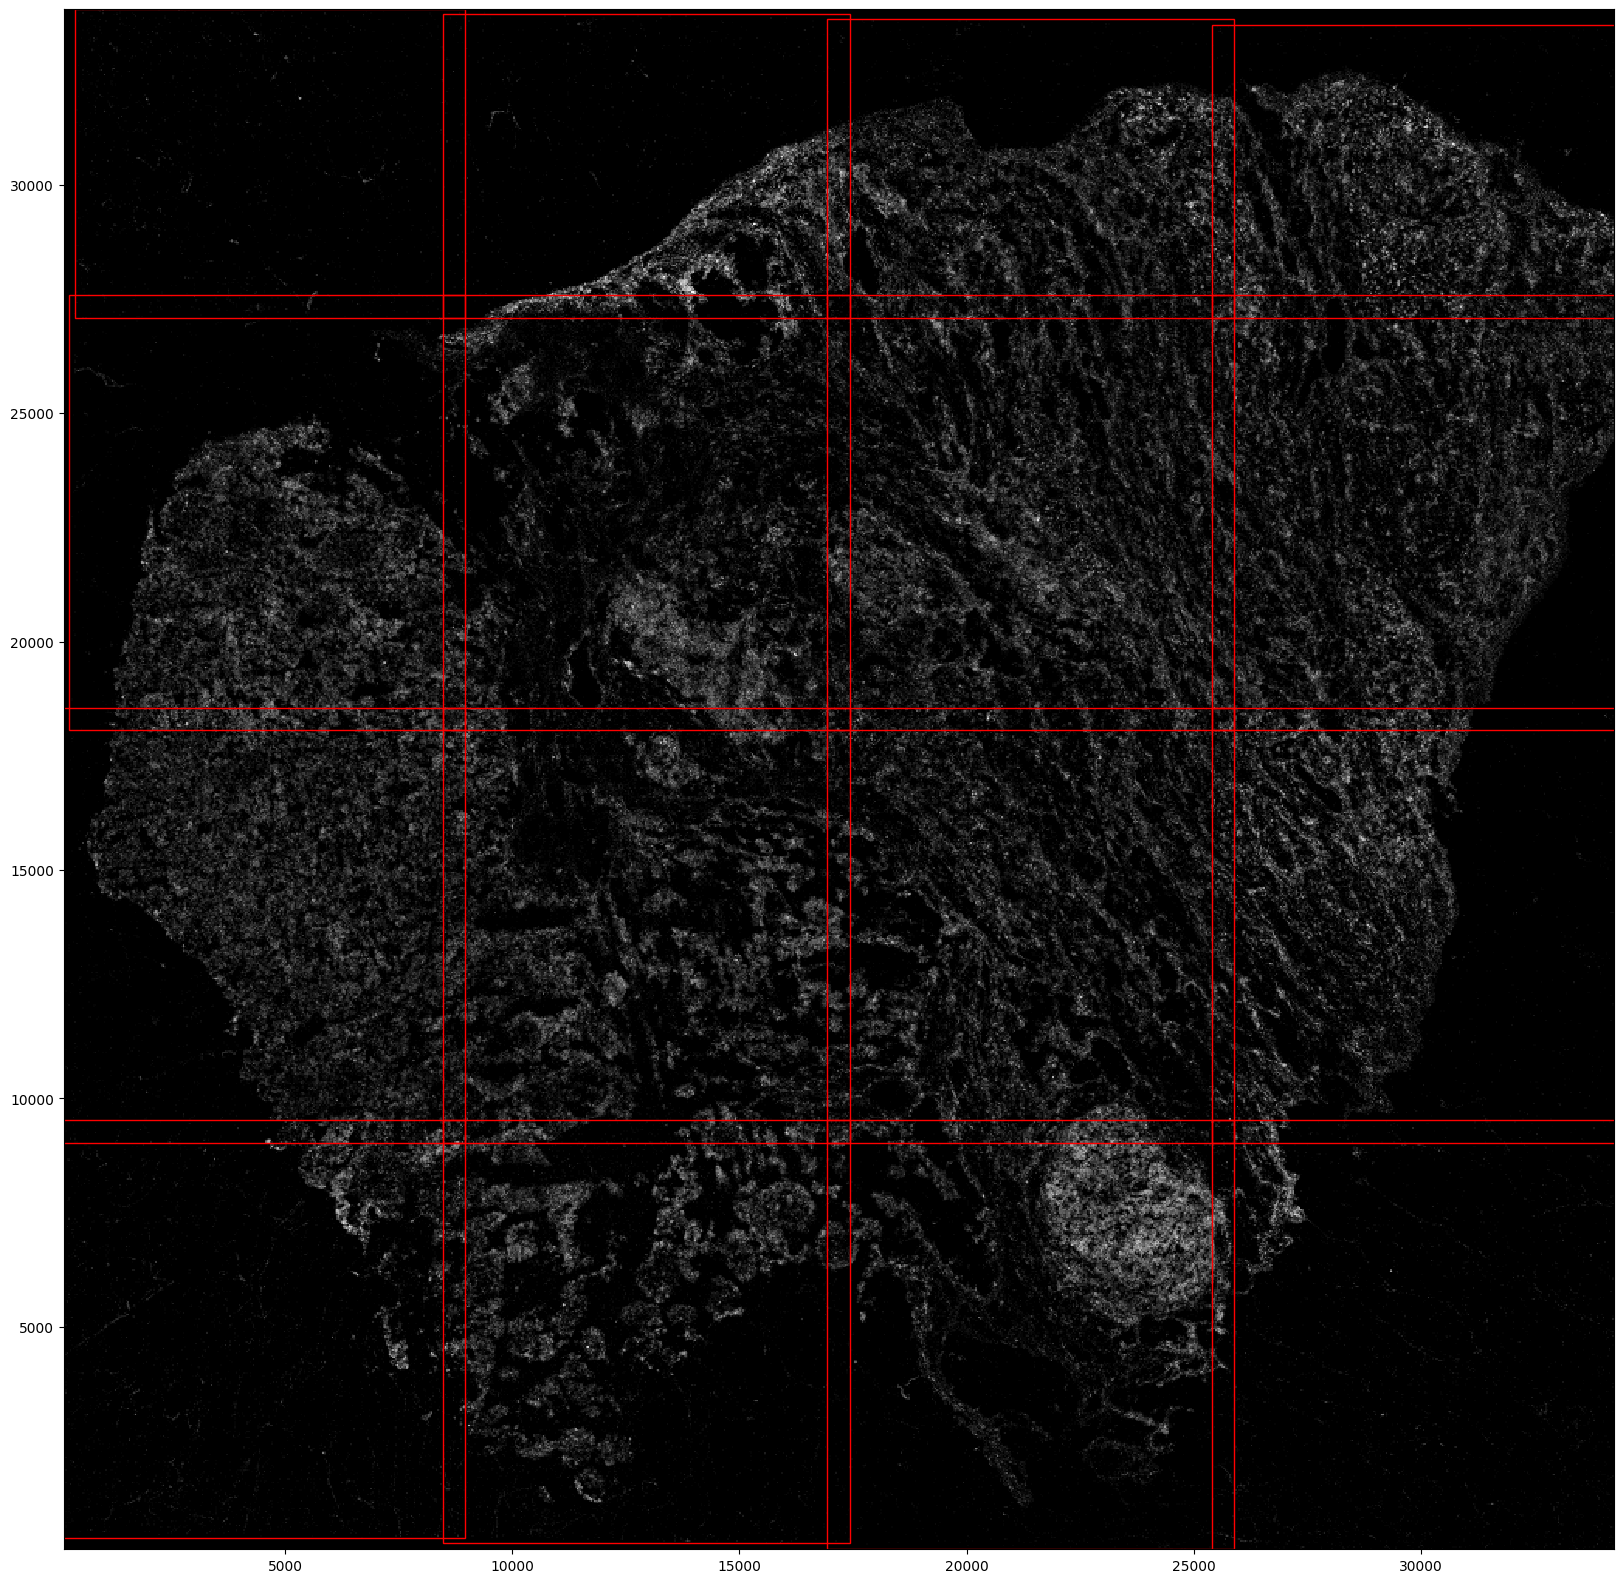

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.hist2d(intensity_deduplicated['X'], intensity_deduplicated['Y'],
           vmin=0, bins=[1000,1000], cmap='gray',)

regions = []
for file in os.listdir(read_dir/'tmp'): 
    df = pd.read_csv(read_dir/'tmp'/file)
    regions.append({'xlim': [df['X'].min(), df['X'].max()], 'ylim': [df['Y'].min(), df['Y'].max()]})
    print('{}: {} points, xlim=[{}, {}], ylim=[{}, {}]'.format(
        file, len(df), df['X'].min(), df['X'].max(), df['Y'].min(), df['Y'].max()))
    
import matplotlib.patches as patches
for region in regions:
    width = region['xlim'][1] - region['xlim'][0]
    height = region['ylim'][1] - region['ylim'][0]
    rect = patches.Rectangle((region['xlim'][0], region['ylim'][0]), width, height,
                             linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()